In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max.columns', 20)
pd.set_option('display.max.rows', 1000)
pd.set_option("display.float_format", lambda x: "%.2f" % x )

### Load The Dataset

In [11]:
df = pd.read_csv("dataset_clean.csv")
df

,state,region,party,votes,votes100,highest_votes,total_votes_counted
0,ABIA,South East,APC,8914,2.41,327095,370037
1,ABIA,South East,LP,327095,88.40,327095,370037
2,ABIA,South East,NNPP,1239,0.33,327095,370037
3,ABIA,South East,OTHERS,10113,2.73,327095,370037
4,ABIA,South East,PDP,22676,6.13,327095,370037
5,ADAMAWA,North East,APC,182881,25.01,417611,731140
6,ADAMAWA,North East,LP,105648,14.45,417611,731140
7,ADAMAWA,North East,NNPP,8006,1.10,417611,731140
8,ADAMAWA,North East,OTHERS,16994,2.32,417611,731140
9,ADAMAWA,North East,PDP,417611,57.12,417611,731140


### Create a staging dataframe

In [12]:
df1 = df.copy()
df1

,state,region,party,votes,votes100,highest_votes,total_votes_counted
0,ABIA,South East,APC,8914,2.41,327095,370037
1,ABIA,South East,LP,327095,88.40,327095,370037
2,ABIA,South East,NNPP,1239,0.33,327095,370037
3,ABIA,South East,OTHERS,10113,2.73,327095,370037
4,ABIA,South East,PDP,22676,6.13,327095,370037
5,ADAMAWA,North East,APC,182881,25.01,417611,731140
6,ADAMAWA,North East,LP,105648,14.45,417611,731140
7,ADAMAWA,North East,NNPP,8006,1.10,417611,731140
8,ADAMAWA,North East,OTHERS,16994,2.32,417611,731140
9,ADAMAWA,North East,PDP,417611,57.12,417611,731140


### Overview the dataframe

In [13]:
df1.head(10)

,state,region,party,votes,votes100,highest_votes,total_votes_counted
0,ABIA,South East,APC,8914,2.41,327095,370037
1,ABIA,South East,LP,327095,88.40,327095,370037
2,ABIA,South East,NNPP,1239,0.33,327095,370037
3,ABIA,South East,OTHERS,10113,2.73,327095,370037
4,ABIA,South East,PDP,22676,6.13,327095,370037
5,ADAMAWA,North East,APC,182881,25.01,417611,731140
6,ADAMAWA,North East,LP,105648,14.45,417611,731140
7,ADAMAWA,North East,NNPP,8006,1.10,417611,731140
8,ADAMAWA,North East,OTHERS,16994,2.32,417611,731140
9,ADAMAWA,North East,PDP,417611,57.12,417611,731140


In [14]:
df1 = df1.sort_values(by = ['state', 'votes100'], ascending = [True, False])
df1

,state,region,party,votes,votes100,highest_votes,total_votes_counted
1,ABIA,South East,LP,327095,88.40,327095,370037
4,ABIA,South East,PDP,22676,6.13,327095,370037
3,ABIA,South East,OTHERS,10113,2.73,327095,370037
0,ABIA,South East,APC,8914,2.41,327095,370037
2,ABIA,South East,NNPP,1239,0.33,327095,370037
9,ADAMAWA,North East,PDP,417611,57.12,417611,731140
5,ADAMAWA,North East,APC,182881,25.01,417611,731140
6,ADAMAWA,North East,LP,105648,14.45,417611,731140
8,ADAMAWA,North East,OTHERS,16994,2.32,417611,731140
7,ADAMAWA,North East,NNPP,8006,1.10,417611,731140


In [15]:
df1.ndim

2

In [16]:
df1.shape

(185, 7)

In [17]:
df1.describe(include=[np.number])

,votes,votes100,highest_votes,total_votes_counted
count,185.00,185.00,185.00,185.00
mean,129939.37,20.00,348499.65,649696.84
std,163155.77,22.53,158794.49,310571.16
min,264.00,0.09,68818.00,165325.00
25%,9263.00,1.77,252282.00,465287.00
50%,56217.00,7.74,327095.00,555089.00
75%,198567.00,37.10,421390.00,770075.00
max,997279.00,95.24,997279.00,1702005.00


In [18]:
df1.describe(include=[object])

,state,region,party
count,185,185,185
unique,37,6,5
top,ABIA,North Central,LP
freq,5,35,37


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1 to 181
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                185 non-null    object 
 1   region               185 non-null    object 
 2   party                185 non-null    object 
 3   votes                185 non-null    int64  
 4   votes100             185 non-null    float64
 5   highest_votes        185 non-null    int64  
 6   total_votes_counted  185 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 11.6+ KB


In [20]:
df1.columns.to_list()

['state',
 'region',
 'party',
 'votes',
 'votes100',
 'highest_votes',
 'total_votes_counted']

In [21]:
df1.dtypes

state                   object
region                  object
party                   object
votes                    int64
votes100               float64
highest_votes            int64
total_votes_counted      int64
dtype: object

### 0. Creating global dataframes and variables

#### Global dataframes

In [22]:
# regions = unique list of regions
# parties = unique list of participating parties
# states = unique list of states by region

regions = pd.DataFrame(list(set(df1['region'])), columns = ['region']).sort_values(by = 'region', ascending = True).reset_index(drop = True)
parties = pd.DataFrame(list(set(df1['party'])), columns = ['party']).sort_values(by = 'party', ascending = True).reset_index(drop = True)
states = df1[['state', 'region']]
states = states.drop_duplicates().sort_values(by = 'state', ascending = True).reset_index(drop = True)
states

,state,region
0,ABIA,South East
1,ADAMAWA,North East
2,AKWA IBOM,South South
3,ANAMBRA,South East
4,BAUCHI,North East
5,BAYELSA,South South
6,BENUE,North Central
7,BORNO,North East
8,CROSS RIVER,South South
9,DELTA,South South


#### Comparing values

In [23]:
sum_totalVotesCounted = list(set(df1['total_votes_counted']))
sum_totalVotesCounted = pd.DataFrame(sum_totalVotesCounted, columns = ['Total_Votes'])
sum_totalVotesCounted = sum_totalVotesCounted.sum().values[0]
sum_totalVotesCounted

sum_totalVotesCount = df1['votes'].sum()
print([sum_totalVotesCounted, sum_totalVotesCount])
print (sum_totalVotesCounted == sum_totalVotesCount)

[24038783, 24038783]
True


In [24]:
# Finding the correlation

df_corr = df1.corr(numeric_only = True)
df_corr

,votes,votes100,highest_votes,total_votes_counted
votes,1.00,0.84,0.33,0.38
votes100,0.84,1.00,0.00,0.00
highest_votes,0.33,0.00,1.00,0.87
total_votes_counted,0.38,0.00,0.87,1.00


#### Global variables

In [25]:
party_color = {
    "PDP": "red",
    "APC": "green",
    "LP": "orange",
    "NNPP": "purple",
    "OTHERS": "blue"
}

### 1. Voting Performance by region

#### Dataframe

In [26]:
# region, 
# votes - sum of votes in the region, 
# votes100 - the percentage of votes in that region compared to other regions
# states - the number of states in that region

#df_RegionVoteSum = group by region to get the sum of votes in the region
df_RegionVoteSum = pd.DataFrame(df1.groupby(["region"])['votes'].sum())
df_RegionVoteSum = df_RegionVoteSum.sort_values(by = 'votes', ascending = False)

#df_stateCont = group by region to get the unique count of states in that region
df_stateCont = pd.DataFrame(df1.groupby(["region"])['state'].nunique())
df_stateCont = df_stateCont.sort_values(by = 'state', ascending = False)

#df_RegionVoteSum = merge df_RegionVoteSum and df_stateCont
df_RegionVoteSum = df_RegionVoteSum.merge(df_stateCont, how = 'inner', on = ['region'])

#df_RegionVoteSum = reset the index, create the votes100, renames state to states, reorder columns
df_RegionVoteSum = df_RegionVoteSum.reset_index()
df_RegionVoteSum = df_RegionVoteSum.assign(votes100 = (df_RegionVoteSum['votes'] /df_RegionVoteSum['votes'].sum()) * 100)
df_RegionVoteSum = df_RegionVoteSum.rename(columns = {'state' : "states"})
df_RegionVoteSum = df_RegionVoteSum[['region', 'votes', 'votes100', 'states']]
df_RegionVoteSum

,region,votes,votes100,states
0,North West,6690622,27.83,7
1,North Central,4564332,18.99,7
2,South West,4253442,17.69,6
3,North East,3439741,14.31,6
4,South South,2857640,11.89,6
5,South East,2233006,9.29,5


#### Chart: Bar

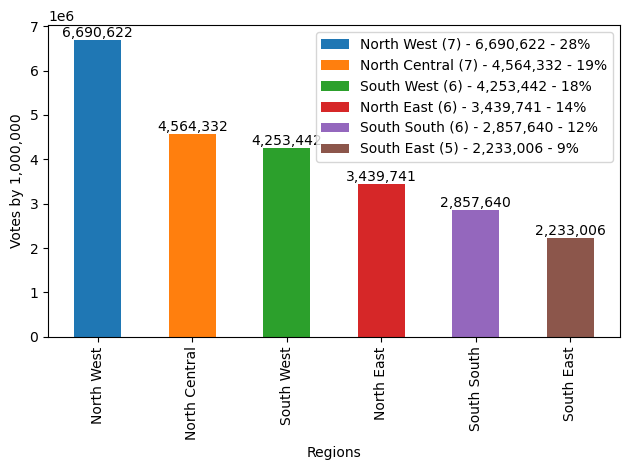

In [29]:
plt.figure()
total_votes = df_RegionVoteSum['votes'].sum()
bars = []
for i in np.arange(len(df_RegionVoteSum)):
    this_pct = df_RegionVoteSum['votes100'].iloc[i]
    this_region = df_RegionVoteSum['region'].iloc[i]
    this_region_stateCount = df_RegionVoteSum['states'].iloc[i]
    this_region_voteSum = df_RegionVoteSum['votes'].iloc[i]
    this_label = "{} ({}) - {:,} - {:.0f}%".format(this_region, this_region_stateCount, this_region_voteSum, this_pct)
    this_bar = plt.bar(this_region, this_region_voteSum, label = this_label, width =0.5)
    this_bar_rect = this_bar[0]
    plt.text(this_bar_rect.get_x() + this_bar_rect.get_width() / 2.0,  this_bar_rect.get_height(), "{:,}".format(this_bar_rect.get_height()), ha='center', va='bottom')
    bars.append(this_bar)
plt.ylabel("Votes by 1,000,000")
plt.xlabel("Regions")
plt.xticks(rotation='vertical')
plt.legend()
plt.tight_layout()
#plt.grid()
plt.show()

#### Chart: Pie

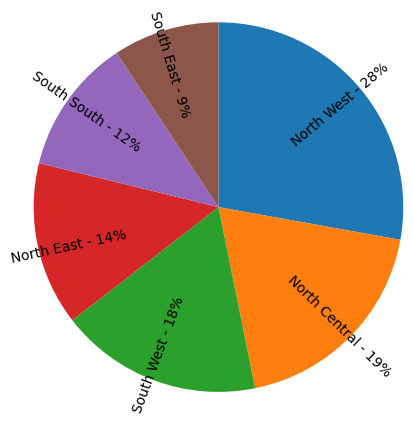

In [30]:
plt.figure()
plt.pie(df_RegionVoteSum['votes100'], 
        radius=1.25, 
        startangle= 90, 
        counterclock = False, 
        labeldistance = 0.5, 
        rotatelabels = True, 
        labels = ["{} - {:.0f}%".format(x, df_RegionVoteSum[df_RegionVoteSum['region'] == x]['votes100'].values[0]) for x in df_RegionVoteSum['region']])
plt.show()

### 2. Party performance by region

#### Dataframe

In [31]:
# df_RegionPartyVoteSum
# region - group of the region by party, 
# party - parties that participated in that region
# votes - sum of votes by party in the region, 
# votes100 - the percentage of party votes in that region compared to other regions


df_RegionPartyVoteSum = pd.DataFrame(df1.groupby(["region", "party"])[['votes', 'total_votes_counted']].sum())
df_RegionPartyVoteSum = df_RegionPartyVoteSum.sort_values(by = ['region', 'votes'], ascending = [True, False])
df_RegionPartyVoteSum = df_RegionPartyVoteSum.assign(votes100 = (df_RegionPartyVoteSum['votes'] / df_RegionPartyVoteSum['total_votes_counted']) * 100)
df_RegionPartyVoteSum = df_RegionPartyVoteSum.drop(columns = ['total_votes_counted'])
df_RegionPartyVoteSum

votes  votes100
region        party                    
North Central APC     1760993     38.58
              LP      1415557     31.01
              PDP     1162087     25.46
              OTHERS   165638      3.63
              NNPP      60057      1.32
North East    PDP     1741846     50.64
              APC     1185458     34.46
              LP       315107      9.16
              NNPP     126343      3.67
              OTHERS    70987      2.06
North West    APC     2652235     39.64
              PDP     2329540     34.82
              NNPP    1268250     18.96
              LP       350182      5.23
              OTHERS    90415      1.35
South East    LP      1960589     87.80
              APC      127605      5.71
              PDP       91198      4.08
              OTHERS    45387      2.03
              NNPP       8227      0.37
South South   LP      1210675     42.37
              APC      799957     27.99
              PDP      717908     25.12
              OTHERS   111933      3.92
              NNPP      17167      0.60
South West    APC     2279407     53.59
              PDP      941941     22.15
              LP       846478     19.90
              OTHERS   168972      3.97
              NNPP      16644      0.39

#### Subplots of Charts

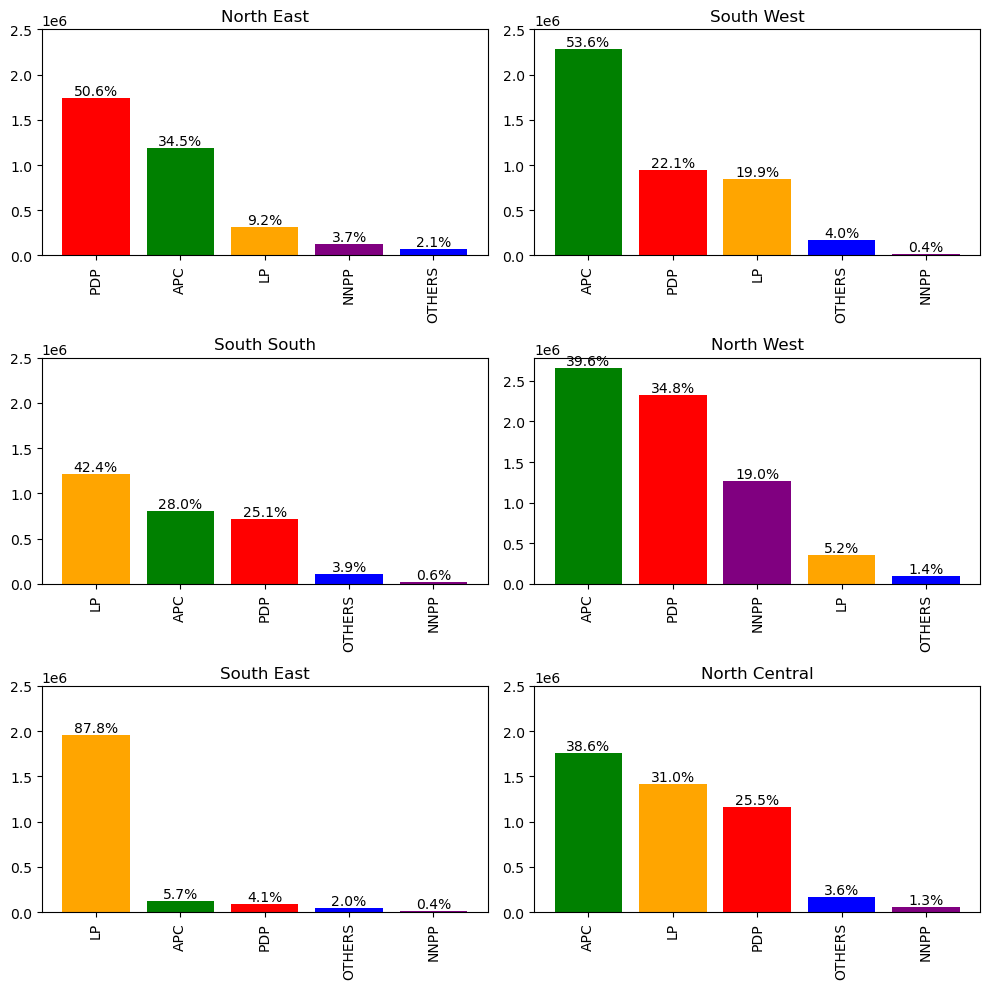

In [32]:
# Each plot represent party performance in each region

plt.figure(figsize = (10,10))
i = 1
for region in list(set(df_RegionPartyVoteSum.index.get_level_values(0).to_list())):
    
    plt.subplot(3,2,i)
    i = i + 1
    for party in df_RegionPartyVoteSum.loc[region].index.to_list():
        this_bar = plt.bar(party, df_RegionPartyVoteSum.loc[region, party].values[0], color = party_color[party])
        this_bar_rect = this_bar[0]
        plt.text(this_bar_rect.get_x() + this_bar_rect.get_width() / 2.0,  this_bar_rect.get_height(), "{:.1f}%".format(df_RegionPartyVoteSum.loc[region, party].values[1]), ha='center', va='bottom', rotation = 'horizontal')
        #plt.xlabel("Party")
        plt.xticks(rotation='vertical')
        plt.yticks(np.arange(0,3000000,500000))
        plt.title(region)
plt.tight_layout()
plt.show()

### 3. Voting Performance by states

#### Dataframe

In [33]:
# state
# votes = sum of the total votes in the state
# votes100 = percentage votes of the state compared to other states

df_StateVotes = pd.DataFrame(df1.groupby(["state"])['votes'].sum())
df_StateVotes = df_StateVotes.sort_values(by = 'votes', ascending = False)
df_StateVotes = df_StateVotes.assign(votes100 = (df_StateVotes['votes'] / df_StateVotes['votes'].sum()) * 100)
df_StateVotes

,votes,votes100
state,,
KANO,1702005,7.08
KADUNA,1360153,5.66
LAGOS,1271451,5.29
PLATEAU,1088170,4.53
KATSINA,1058673,4.40
JIGAWA,920531,3.83
BAUCHI,853516,3.55
OYO,809485,3.37
NIGER,778668,3.24


#### Chart

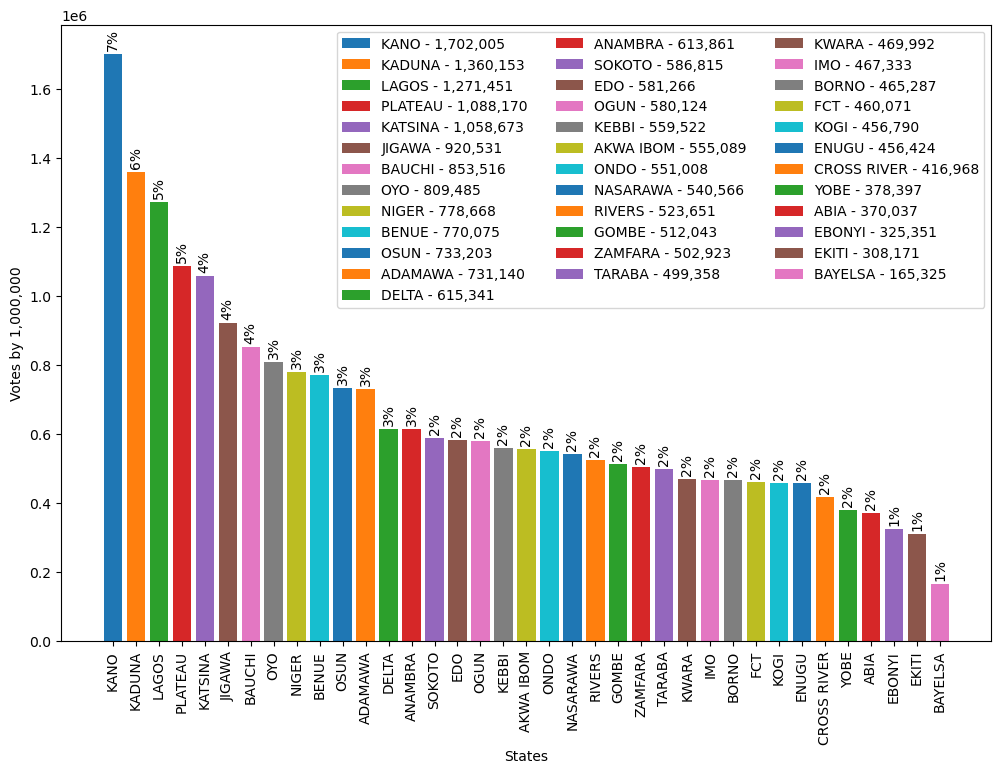

In [34]:
plt.figure(figsize = (12,8))
for i in df_StateVotes.index.to_list():
    this_pct = (df_StateVotes['votes'].loc[i] / total_votes) * 100
    this_bar = plt.bar(i, df_StateVotes['votes'].loc[i], label = "{} - {:,}".format(i, df_StateVotes['votes'].loc[i]))
    this_bar_rect = this_bar[0]
    plt.text(this_bar_rect.get_x() + this_bar_rect.get_width() / 2.0,  this_bar_rect.get_height() + 10000, "{:.0f}%".format(this_pct), ha='center', va='bottom', rotation = 'vertical')
plt.ylabel("Votes by 1,000,000")
plt.xlabel("States")
plt.xticks(rotation='vertical')
plt.legend(ncols = 3)
#plt.grid()
plt.show()

### 4. States By Party that won the highest votes

#### Dataframe

In [35]:
df_StatePartyHighest = df1.query('highest_votes == votes')
df_StatePartyHighest = df_StatePartyHighest.sort_values(by = ['votes100'], ascending = False)
df_StatePartyHighest = df_StatePartyHighest.reset_index(drop = True)
df_StatePartyHighest

,state,region,party,votes,votes100,highest_votes,total_votes_counted
0,ANAMBRA,South East,LP,584621,95.24,584621,613861
1,ENUGU,South East,LP,428640,93.91,428640,456424
2,ABIA,South East,LP,327095,88.40,327095,370037
3,EBONYI,South East,LP,259738,79.83,259738,325351
4,IMO,South East,LP,360495,77.14,360495,467333
5,ONDO,South West,APC,369924,67.14,369924,551008
6,EKITI,South West,APC,201494,65.38,201494,308171
7,GOMBE,North East,PDP,319123,62.32,319123,512043
8,FCT,North Central,LP,281717,61.23,281717,460071
9,ZAMFARA,North West,APC,298396,59.33,298396,502923


#### Chart

In [37]:
df_StatePartyVoteCount = pd.DataFrame(df_StatePartyHighest.groupby(['party'])['state'].count())
df_StatePartyVoteCount

df_StatePartyVoteSum = pd.DataFrame(df_StatePartyHighest.groupby(['party'])['votes'].sum())
df_StatePartyVoteCount = df_StatePartyVoteCount.merge(df_StatePartyVoteSum, on = ['party'])
#df_StatePartyVoteCount = df_StatePartyVoteCount.reset_index()
df_StatePartyVoteCount

,state,votes
party,,
APC,12,3756489
LP,12,4335339
NNPP,1,997279
PDP,12,3805380


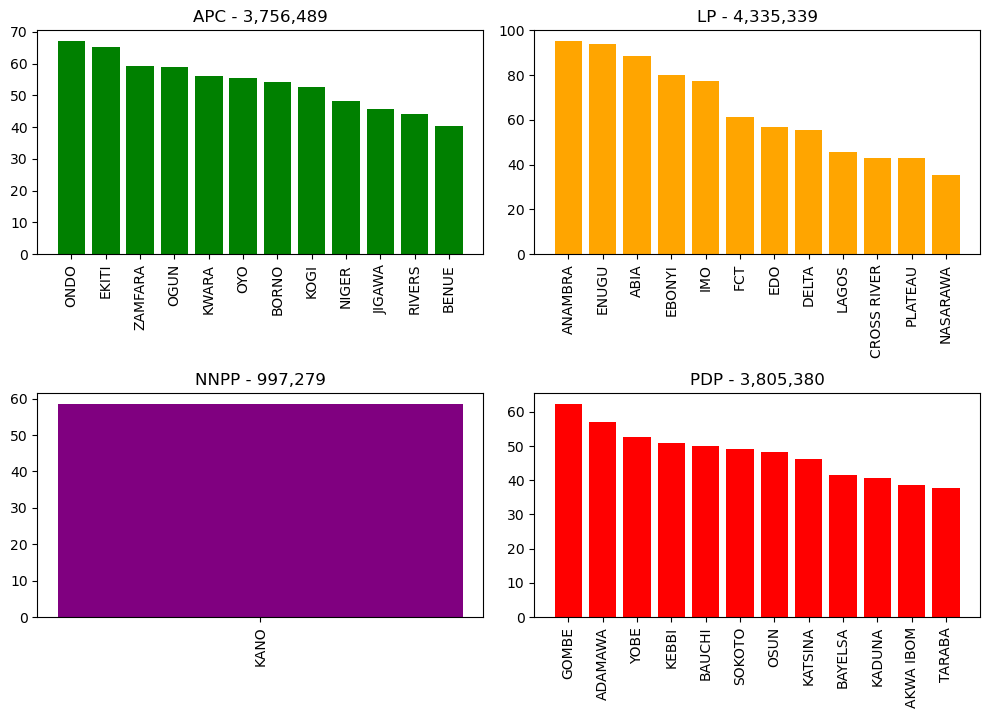

In [38]:
plt.figure(figsize = (10,10))
i = 0
for party_item in parties[parties['party'] != "OTHERS"]['party']:
    i = i + 1
    plt.subplot(3,2,i)
    for state in df_StatePartyHighest[df_StatePartyHighest['party'] == party_item]['state']:
        votes_100 = df_StatePartyHighest[df_StatePartyHighest['state'] == state]['votes100'].values[0]
        party = df_StatePartyHighest[df_StatePartyHighest['state'] == state]['party'].values[0]
        this_bar = plt.bar(state, votes_100, color = party_color[party])
        plt.xticks(rotation='vertical')
        plt.title("{} - {:,}".format(party, df_StatePartyVoteCount.loc[party].values[1]))
        #this_bar_rect = this_bar[0]
        #plt.text(this_bar_rect.get_x() + this_bar_rect.get_width() / 2.0,  this_bar_rect.get_height() + 10000, party, ha='center', va='bottom', rotation = 'vertical')
      

plt.tight_layout()
plt.show()

### 5. Party dominance by votes across the nation

#### Dataframe

In [53]:
df_partyDominance = pd.DataFrame(df1.groupby(['party'])[['votes', 'total_votes_counted']].sum())
df_partyDominance = df_partyDominance.sort_values(by = ['votes'], ascending = False)
df_partyDominance = df_partyDominance.assign(votes100 = (df_partyDominance['votes'] / df_partyDominance['total_votes_counted']) * 100)
df_partyDominance = df_partyDominance.drop(columns = ['total_votes_counted'])
df_partyDominance = df_partyDominance.reset_index()
df_partyDominance

,party,votes,votes100
0,APC,8805655,36.63
1,PDP,6984520,29.06
2,LP,6098588,25.37
3,NNPP,1496688,6.23
4,OTHERS,653332,2.72


#### Chart

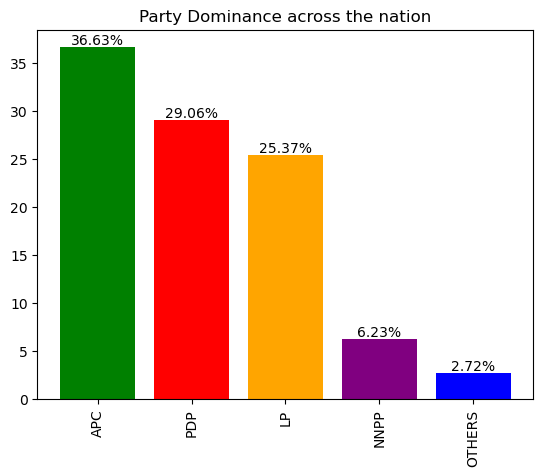

In [67]:
plt.figure()

for iParty in df_partyDominance.values:
    votes100 = iParty[2]
    party = iParty[0]
    this_bar = plt.bar(party, votes100, color = party_color[party])
    this_bar_rect = this_bar[0]
    plt.text(this_bar_rect.get_x() + this_bar_rect.get_width() / 2.0,  this_bar_rect.get_height(), "{:.2f}%".format(votes100), ha='center', va='bottom', rotation = 'horizontal')
    plt.xticks(rotation='vertical')
    #plt.yticks(np.arange(0,3000000,500000))
    plt.title("Party Dominance across the nation")
plt.show()

### 6. Party performance by states

#### Dataframe

In [39]:
# state = group of states by party
# party = participating parties in the state
# votes = total votes of the party in the states
# votes100  = percentage of the total votes of the party in the states

df_StatePartyVotes = pd.DataFrame(df1.groupby(["state",'party'])[['votes', 'total_votes_counted']].sum())
df_StatePartyVotes = df_StatePartyVotes.sort_values(by = ['state', 'votes'], ascending = [True, False])
df_StatePartyVotes = df_StatePartyVotes.assign(votes100 = (df_StatePartyVotes['votes'] / df_StatePartyVotes['total_votes_counted']) * 100)

df_StatePartyVotes = df_StatePartyVotes.drop(columns = ['total_votes_counted'])
df_StatePartyVotes

votes  votes100
state       party                   
ABIA        LP      327095     88.40
            PDP      22676      6.13
            OTHERS   10113      2.73
            APC       8914      2.41
            NNPP      1239      0.33
ADAMAWA     PDP     417611     57.12
            APC     182881     25.01
            LP      105648     14.45
            OTHERS   16994      2.32
            NNPP      8006      1.10
AKWA IBOM   PDP     214012     38.55
            APC     160620     28.94
            LP      132683     23.90
            OTHERS   39978      7.20
            NNPP      7796      1.40
ANAMBRA     LP      584621     95.24
            OTHERS   13126      2.14
            PDP       9036      1.47
            APC       5111      0.83
            NNPP      1967      0.32
BAUCHI      PDP     426607     49.98
            APC     316694     37.10
            NNPP     72103      8.45
            LP       27373      3.21
            OTHERS   10739      1.26
BAYELSA     PDP      68818     41.63
            LP       49975     30.23
            APC      42572     25.75
            OTHERS    3420      2.07
            NNPP       540      0.33
BENUE       APC     310468     40.32
            LP      308372     40.04
            PDP     130081     16.89
            OTHERS   16414      2.13
            NNPP      4740      0.62
BORNO       APC     252282     54.22
            PDP     190921     41.03
            OTHERS   10253      2.20
            LP        7205      1.55
            NNPP      4626      0.99
CROSS RIVER LP      179917     43.15
            APC     130520     31.30
            PDP      95425     22.89
            OTHERS    9462      2.27
            NNPP      1644      0.39
DELTA       LP      341866     55.56
            PDP     161600     26.26
            APC      90183     14.66
            OTHERS   18570      3.02
            NNPP      3122      0.51
EBONYI      LP      259738     79.83
            APC      42402     13.03
            PDP      13503      4.15
            OTHERS    8047      2.47
            NNPP      1661      0.51
EDO         LP      331163     56.97
            APC     144471     24.85
            PDP      89585     15.41
            OTHERS   13304      2.29
            NNPP      2743      0.47
EKITI       APC     201494     65.38
            PDP      89554     29.06
            LP       11397      3.70
            OTHERS    5462      1.77
            NNPP       264      0.09
ENUGU       LP      428640     93.91
            PDP      15749      3.45
            OTHERS    5455      1.20
            APC       4772      1.05
            NNPP      1808      0.40
FCT         LP      281717     61.23
            APC      90902     19.76
            PDP      74194     16.13
            OTHERS    8741      1.90
            NNPP      4517      0.98
GOMBE       PDP     319123     62.32
            APC     146977     28.70
            LP       26160      5.11
            NNPP     10520      2.05
            OTHERS    9263      1.81
IMO         LP      360495     77.14
            APC      66406     14.21
            PDP      30234      6.47
            OTHERS    8646      1.85
            NNPP      1552      0.33
JIGAWA      APC     421390     45.78
            PDP     386587     42.00
            NNPP     98234     10.67
            OTHERS   12431      1.35
            LP        1889      0.21
KADUNA      PDP     554360     40.76
            APC     399293     29.36
            LP      294494     21.65
            NNPP     92969      6.84
            OTHERS   19037      1.40
KANO        NNPP    997279     58.59
            APC     517341     30.40
            PDP     131716      7.74
            LP       28513      1.68
            OTHERS   27156      1.60
KATSINA     PDP     489045     46.19
            APC     482283     45.56
            NNPP     69386      6.55
            OTHERS   11583      1.09
            LP        6376      0.60
KEBBI       PDP     285175     50.97
            APC     24808

#### Chart 1

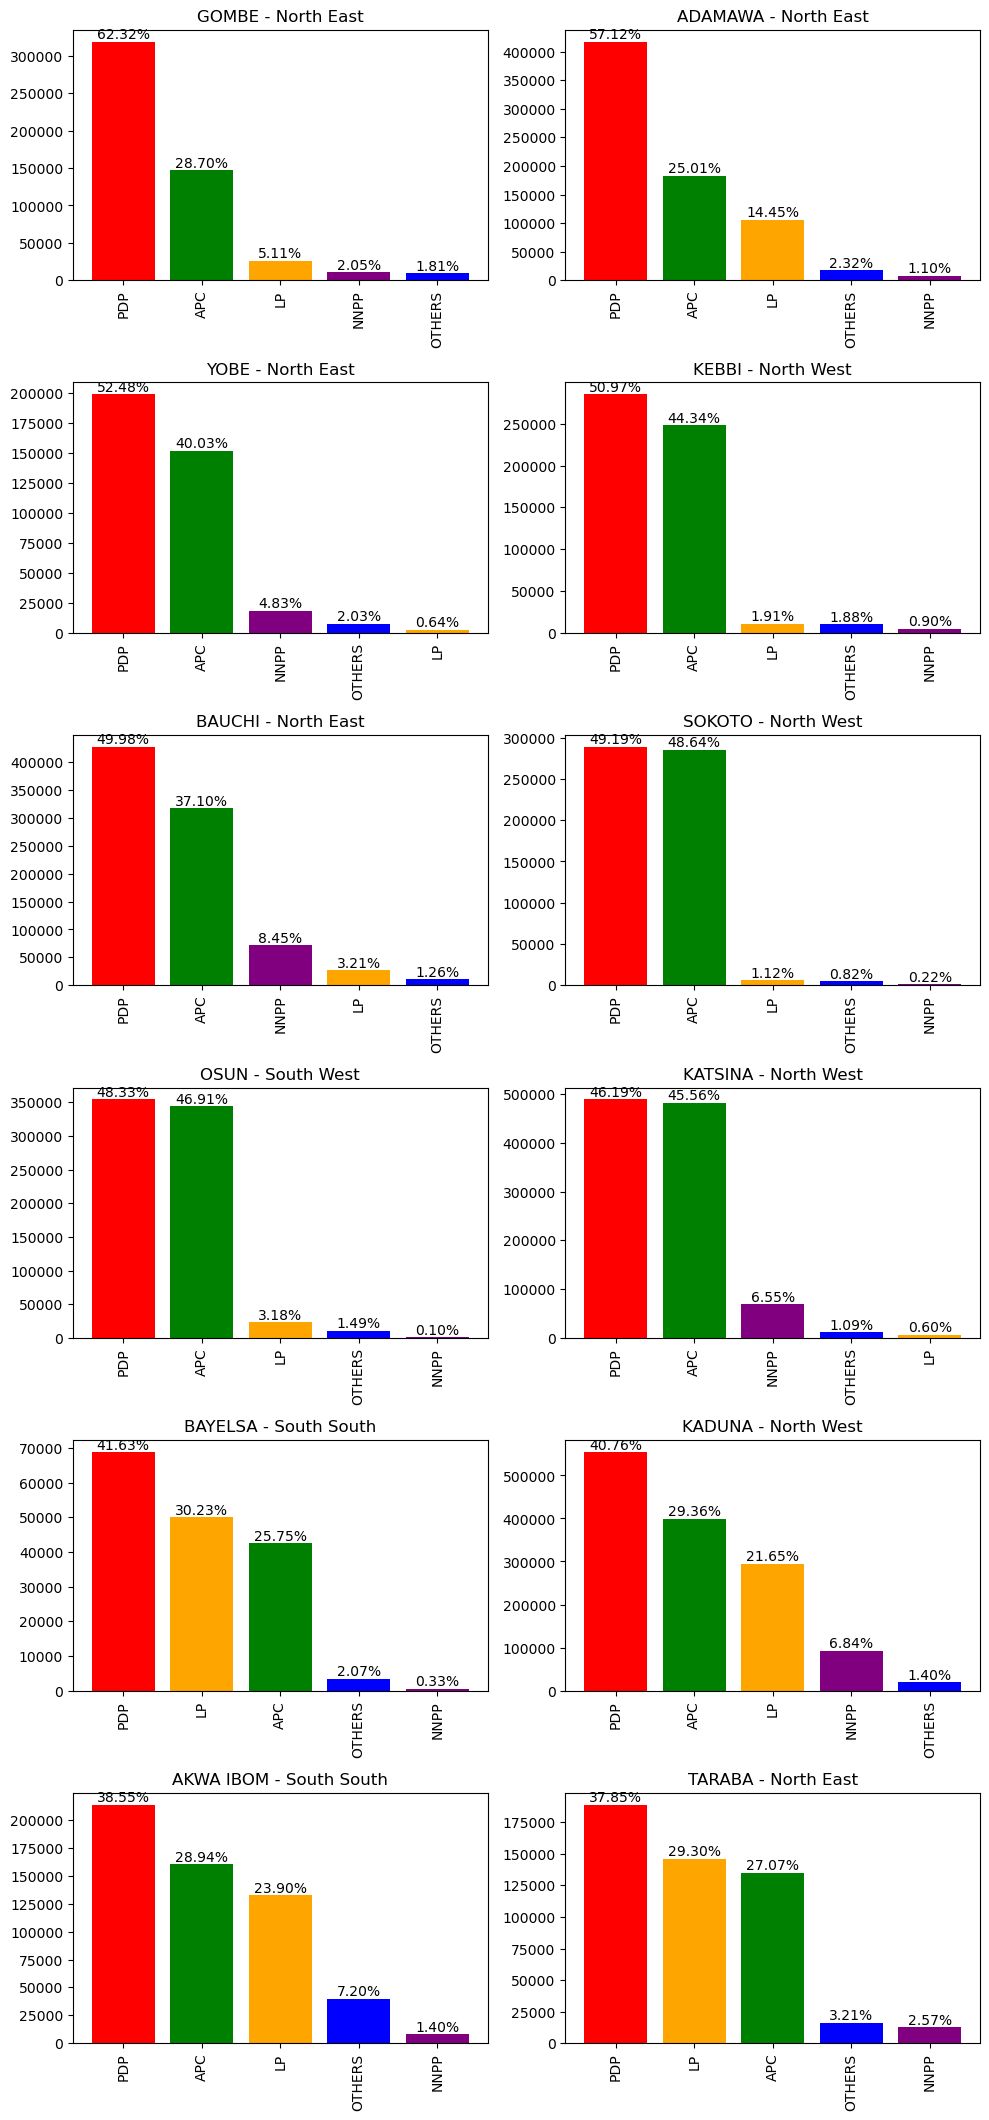

In [40]:
party_color = {
    "PDP": "red",
    "APC": "green",
    "LP": "orange",
    "NNPP": "purple",
    "OTHERS": "blue"
}
df_StatePartyHighestAPC = df_StatePartyHighest.query("party == 'APC'")
df_StatePartyHighestLP = df_StatePartyHighest.query("party == 'LP'")
df_StatePartyHighestPDP = df_StatePartyHighest.query("party == 'PDP'")
df_StatePartyHighestNNPP = df_StatePartyHighest.query("party == 'NNPP'")
df_StatesSouthWest = states[states['region'].str.contains("South West") ]
df_StatesNorthWest = states[states['region'].str.contains("North West") ]
df_StatesSouthSouth = states[states['region'].str.contains("South South") ]

selected_state = df_StatePartyHighestPDP

selected_party = ['APC', 'LP', 'PDP', 'NNPP']
plt.figure(figsize = (10,70))
i = 1
for state in selected_state['state']:
    region = states.query('state == "'+state+'"')['region'].values[0]
    plt.subplot(20,2,i)
    i = i + 1
    selected_party = df_StatePartyVotes.loc[state].index.to_list()
    for party in selected_party:
        vote100 = df1.query("state == '"+state+"' and party == '"+party+"' ")['votes100'].values[0]
        this_bar = plt.bar(party, df_StatePartyVotes.loc[state, party].values[0], color = party_color[party])
        this_bar_rect = this_bar[0]
        plt.text(this_bar_rect.get_x() + this_bar_rect.get_width() / 2.0,  this_bar_rect.get_height(), "{:.2f}%".format(vote100), ha='center', va='bottom', rotation = 'horizontal')
        #plt.xlabel("Party")
        plt.xticks(rotation='vertical')
        #plt.yticks(np.arange(0,3000000,500000))
        plt.title("{} - {}".format(state, region))
plt.tight_layout()
plt.show()
#plt.savefig("")

#### Chart 2

In [41]:
default_values = {'x' : [], 'y': []}

party_struct = {
    "PDP": {"color": "red", "values": default_values},
    "APC": {"color": "green", "values": default_values},
    "LP": {"color": "orange", "values": default_values},
    "NNPP": {"color": "purple", "values": default_values},
    "OTHERS": {"color": "blue", "values": default_values}
}


for party in parties.query("party != 'OTHERS'")['party']:
    state_list = df1.query("party == '"+party+"'").sort_values(by = ['votes'], ascending = False)
    state_list = state_list['state'].to_list()
    
    list_party_votes = []
    for state in state_list:
        list_party_votes.append(df_StatePartyVotes.loc[state, party]['votes'])
    
    party_struct[party]['values'] = {"x": state_list, "y": list_party_votes}
    #print(party)
    #print(party_struct[party])

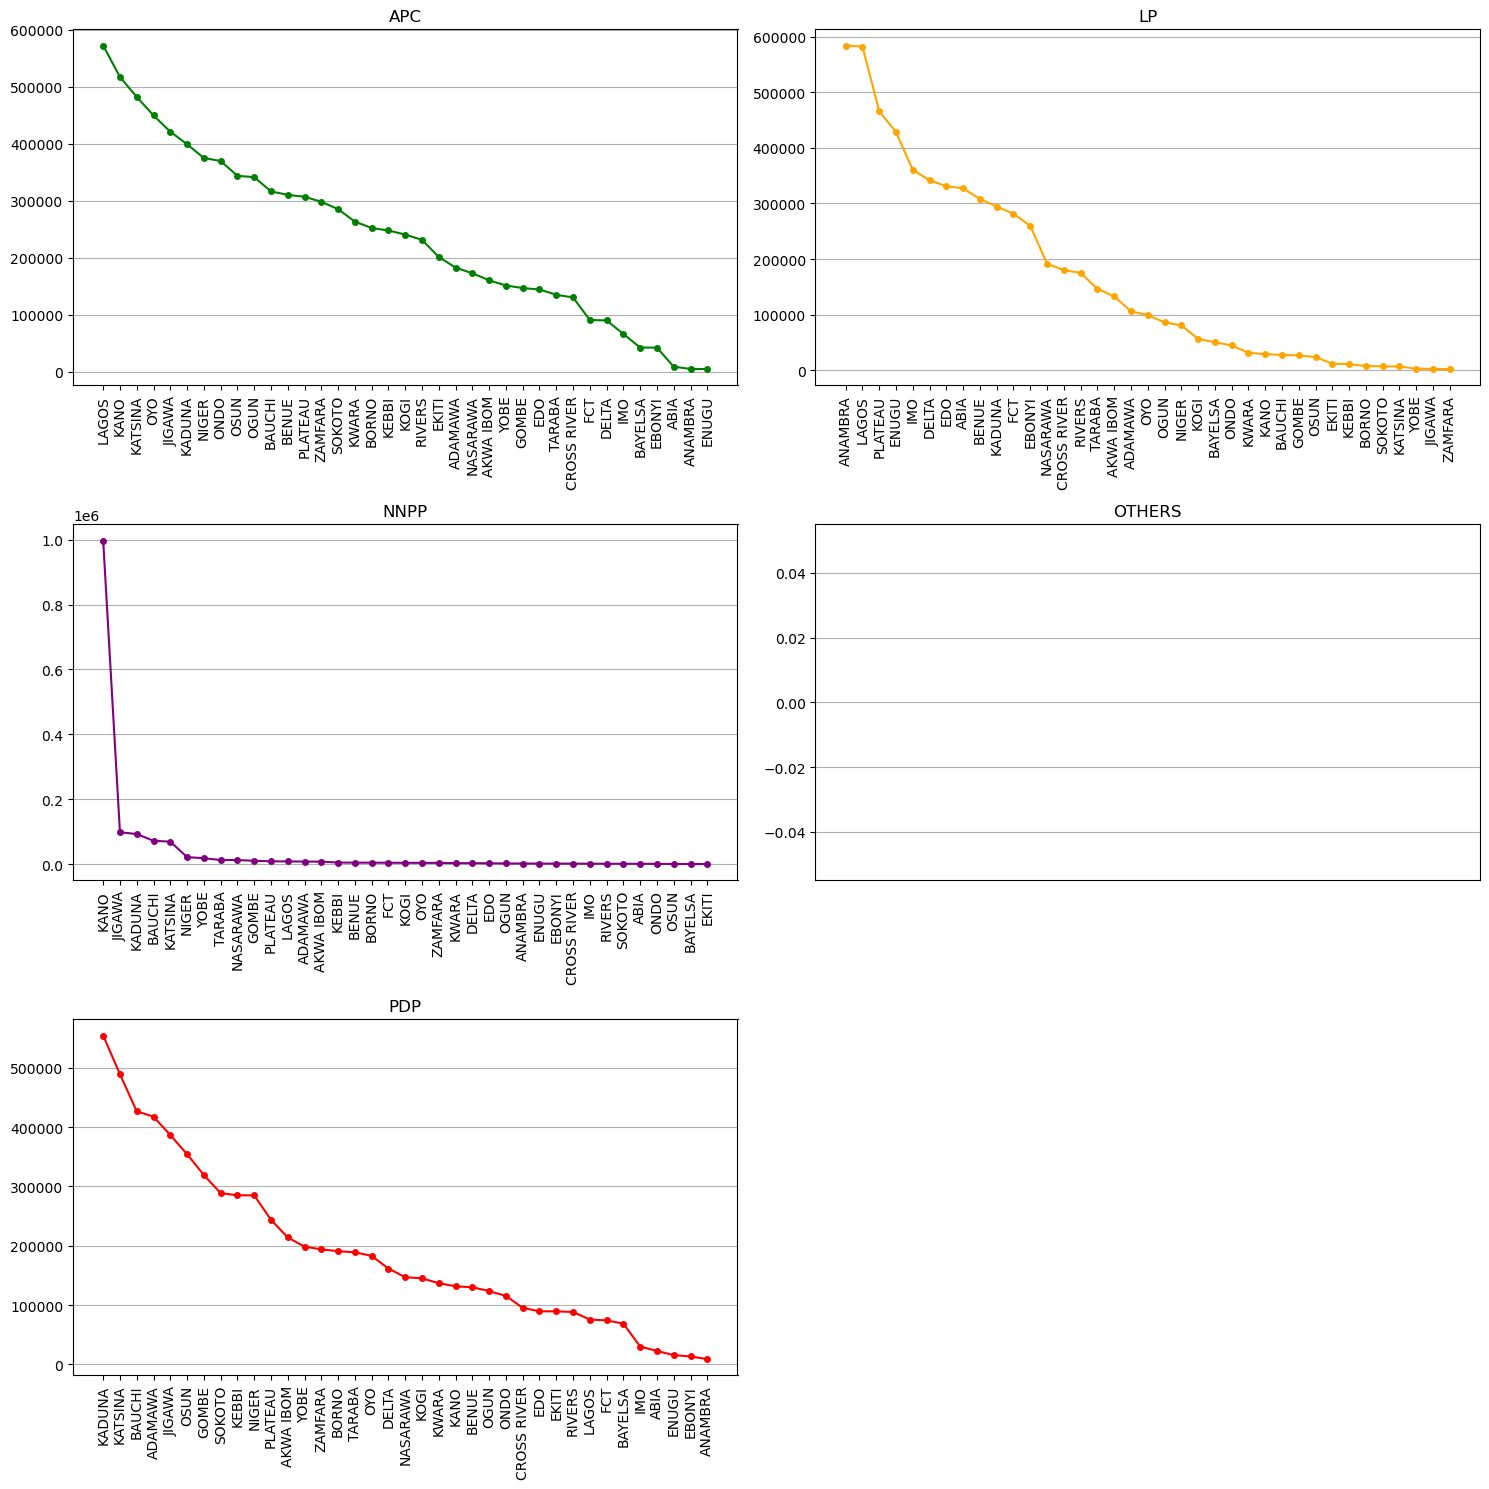

In [42]:
plt.figure(figsize = [15,15])

i = 0
for party in parties['party']:
    i = i + 1
    plt.subplot(3,2,i)
    this_party = party
    plt.plot(np.arange(len(party_struct[this_party]['values']['x'])), party_struct[this_party]['values']['y'], color = party_struct[this_party]['color'], marker = 'o', markersize = 4)
    plt.xticks(np.arange(len(party_struct[this_party]['values']['x'])), ["{}".format(x) for x in party_struct[this_party]['values']['x']], rotation='vertical')
    plt.title(this_party)
    plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

### Final